#Data Extraction

In [ ]:
# importing required libraries

import tweepy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

In [ ]:

"""
At present, with the current access tweet retrieval is limited to the history of the past 7 days.

"""
# Fill in your API credentials
# User tokens and API credentials
consumer_key = 'ijKxmlyPvueWuWlzjH7htDtBq'
consumer_secret = 'LhzuJ8nrrFSHFLlqTMIbhXqB2vu6IS1OUwMO0gE8N1s5yoh8CP'
access_key = '992092540332662784-9Wc4sukYGUh8JEK7mz852r3nVrY2kZj'
access_secret = 'J3CPcz7ofMiNBQD3Cg2W6SjdtWBFiPXVg8uqI64KmzAaw'

# Authenticate with the Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

# Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

# Get input from the user
country = input("Enter a country: ").lower()
city = input("Enter a city: ").lower()
radius = input("Enter a radius (in km): ")
hashtags = input("Enter hashtags separated by a space: ").split()
hashtags = ["#" + tag if not tag.startswith("#") else tag for tag in hashtags] # Add # symbol if missing

# Convert city and country to latitude and longitude using geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode(city + ", " + country)
latitude = location.latitude
longitude = location.longitude

# Create an empty dictionary to store the tweet data for each hashtag
hashtag_data = {}

# Search for tweets that match each hashtag and geolocation, and store the data in the dictionary
for hashtag in hashtags:
    tweet_data = []
    for tweet in tweepy.Cursor(api.search_tweets, q=hashtag, geocode=f"{latitude},{longitude},{radius}km", tweet_mode="extended", lang="en").items():
        # Extract the information we want from each tweet
        data = {
            "id": tweet.id,
            "created_at": tweet.created_at,
            "full_text": tweet.full_text,
            "user_id": tweet.user.id,
            "user_name": tweet.user.name,
            "user_screen_name": tweet.user.screen_name,
            "user_location": tweet.user.location,
            "retweet_count": tweet.retweet_count,
            "favorite_count": tweet.favorite_count,
            "hashtags": [hashtag["text"] for hashtag in tweet.entities["hashtags"]]
        }
        tweet_data.append(data)
    
    # Convert the tweet data to a DataFrame
    df = pd.DataFrame(tweet_data)

    # Save the dataframe to a CSV

    df.to_csv('tweet_data.csv', index=False)
    
    # Save the DataFrame to a CSV file based on city, country and specified radius.
    # This will also create a seperate CSV file based on matches for each hashtag.
    filename = f"{hashtag.replace('#', '')}_{city}_{country}_{radius}km"

    df.to_csv(f"{filename}.csv", index=False)
    
    # Add the DataFrame to the dictionary
    hashtag_data[hashtag] = df

# Print the number of tweets found for each hashtag
for hashtag, df in hashtag_data.items():
    print(f"{hashtag}: {len(df)} tweets found.")

Enter a country: UK
Enter a city: London
Enter a radius (in km): 5000
Enter hashtags separated by a space: Ramadan Mubarak
#Ramadan: 2220 tweets found.
#Mubarak: 17 tweets found.


Include hashtags that mention both or all keywords

In [ ]:
# Load the CSV files into pandas dataframes
df1 = pd.read_csv('/content/Mubarak_london_uk_5000km.csv')
df2 = pd.read_csv('/content/Ramadan_london_uk_5000km.csv')

# Concatenate the dataframes vertically (row-wise)
merged_df = pd.concat([df1, df2])

# Save the merged dataframe to a new CSV file
merged_df.to_csv("/content/merged_file.csv", index=False)

In [ ]:
df = pd.read_csv('/content/merged_file.csv')
df.head()

,id,created_at,full_text,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,@CRYPT_BOSSY Ramadan kareem to all our muslim ...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,@CRYPT_BOSSY The month full of blessings is he...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,#Ramadan #Mubarak to you all. Ramadan is the m...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,#Ramadan #mubarak everyone https://t.co/I5yE2d...,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,Ramzan Mubarak!\nOpooleTech wishes you all a ...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tweetsDataFrame = pd.read_csv('merged_file.csv')

In [ ]:
tweetsDataFrame = tweetsDataFrame.rename(columns={'full_text': 'Tweets'}) 

In [ ]:
tweetsDataFrame.head()

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,@CRYPT_BOSSY Ramadan kareem to all our muslim ...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,@CRYPT_BOSSY The month full of blessings is he...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,#Ramadan #Mubarak to you all. Ramadan is the m...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,#Ramadan #mubarak everyone https://t.co/I5yE2d...,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,Ramzan Mubarak!\nOpooleTech wishes you all a ...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."


In [ ]:
print(tweetsDataFrame.head())
print(tweetsDataFrame.info())
print(tweetsDataFrame.shape)

                    id                 created_at  \
0  1638650777018281984  2023-03-22 21:16:04+00:00   
1  1638639390305013762  2023-03-22 20:30:49+00:00   
2  1638622024825184271  2023-03-22 19:21:49+00:00   
3  1638621807866421298  2023-03-22 19:20:57+00:00   
4  1638617891871547392  2023-03-22 19:05:24+00:00   

                                              Tweets              user_id  \
0  @CRYPT_BOSSY Ramadan kareem to all our muslim ...  1437034040562003970   
1  @CRYPT_BOSSY The month full of blessings is he...  1599266308721463296   
2  #Ramadan #Mubarak to you all. Ramadan is the m...           3345830878   
3  #Ramadan #mubarak everyone https://t.co/I5yE2d...            570930472   
4  Ramzan Mubarak!\nOpooleTech  wishes you all a ...            408245916   

                 user_name user_screen_name            user_location  \
0                    Juman         Juman_vi                  Nigeria   
1            sidiq Tesleem     SidiqTesleem                 Nigeria    
2 

#Data Pre-Processing


### Convert tweets to lowercase

In [ ]:
# Remove duplication
tweetsDataFrame["Tweets"] = tweetsDataFrame["Tweets"].str.lower()

""" specific to lowercase due to limitation of being used in vector """

' specific to lowercase due to limitation of being used in vector '

In [ ]:
tweetsDataFrame

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,@crypt_bossy ramadan kareem to all our muslim ...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,@crypt_bossy the month full of blessings is he...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,#ramadan #mubarak to you all. ramadan is the m...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,#ramadan #mubarak everyone https://t.co/i5ye2d...,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak!\nopooletech wishes you all a ...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,if you’re fasting and feasting during #ramadan...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may this divine month bring your family togeth...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah the day that whatsapp will turn to m...,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,#moon_sighting\n\nkeep up-to-date with the res...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


### Removing hashtags and mentions

In [ ]:
tweetsDataFrame["Tweets"][1]

'@crypt_bossy the month full of blessings is here again and alhamdulilah for witnessing it. #ramadan #mubarak @aman_raaja @tbeck48941054 @mariagobel1'

In [ ]:
import re
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub("@[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])
    tweetsDataFrame["Tweets"][i] = re.sub("#[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])
    
tweetsDataFrame

<ipython-input-173-718e9c64b640>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub("@[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])
<ipython-input-173-718e9c64b640>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub("#[A-Za-z0-9_]+","", tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem to all our muslim brother's an...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,the month full of blessings is here again and...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,to you all. ramadan is the month of blessing...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone https://t.co/i5ye2d8h6s,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak!\nopooletech wishes you all a ...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,if you’re fasting and feasting during and won...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may this divine month bring your family togeth...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah the day that whatsapp will turn to m...,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,\n\nkeep up-to-date with the results of moon ...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


In [ ]:
tweetsDataFrame.head()

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem to all our muslim brother's an...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,the month full of blessings is here again and...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,to you all. ramadan is the month of blessing...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone https://t.co/i5ye2d8h6s,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak!\nopooletech wishes you all a ...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."


### Removing links

In [ ]:
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub(r"http\S+","", tweetsDataFrame["Tweets"][i])
    tweetsDataFrame["Tweets"][i] = re.sub(r"www.\S+","", tweetsDataFrame["Tweets"][i])

tweetsDataFrame

<ipython-input-175-077c03d8ec28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub(r"http\S+","", tweetsDataFrame["Tweets"][i])
<ipython-input-175-077c03d8ec28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub(r"www.\S+","", tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem to all our muslim brother's an...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,the month full of blessings is here again and...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,to you all. ramadan is the month of blessing...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak!\nopooletech wishes you all a ...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,if you’re fasting and feasting during and won...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may this divine month bring your family togeth...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah the day that whatsapp will turn to m...,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,\n\nkeep up-to-date with the results of moon ...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


### Removing punctuations

In [ ]:
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub('[()!?]',' ', tweetsDataFrame["Tweets"][i])
    tweetsDataFrame["Tweets"][i] = re.sub('\[.*?\]',' ', tweetsDataFrame["Tweets"][i])
tweetsDataFrame

<ipython-input-176-e8eef13b0643>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub('[()!?]',' ', tweetsDataFrame["Tweets"][i])
<ipython-input-176-e8eef13b0643>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub('\[.*?\]',' ', tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem to all our muslim brother's an...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,the month full of blessings is here again and...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,to you all. ramadan is the month of blessing...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak \nopooletech wishes you all a ...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,if you’re fasting and feasting during and won...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may this divine month bring your family togeth...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah the day that whatsapp will turn to m...,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,\n\nkeep up-to-date with the results of moon ...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


In [ ]:
tweetsDataFrame["Tweets"][0]

" ramadan kareem to all our muslim brother's and sister's. may the love of allah be with y'all\n\n  \n \n\n\n "

### Filtering non-alphanumeric characters

In [ ]:
for i in range(0, len(tweetsDataFrame["Tweets"])):
    tweetsDataFrame["Tweets"][i] = re.sub("[^a-z0-9]"," ", tweetsDataFrame["Tweets"][i])

tweetsDataFrame

<ipython-input-178-a5b348948667>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = re.sub("[^a-z0-9]"," ", tweetsDataFrame["Tweets"][i])


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem to all our muslim brother s an...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,the month full of blessings is here again and...,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,to you all ramadan is the month of blessing...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak opooletech wishes you all a b...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,if you re fasting and feasting during and won...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may this divine month bring your family togeth...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah the day that whatsapp will turn to m...,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,keep up to date with the results of moon si...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


In [ ]:
tweetsDataFrame["Tweets"][0]

' ramadan kareem to all our muslim brother s and sister s  may the love of allah be with y all          '

### Stop words removal

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words.update({'from', 'subject', 'rt', 'RT'})

for i in range(0, len(tweetsDataFrame["Tweets"])):
    temp = str(tweetsDataFrame["Tweets"][i]).split()
    temp = [j for j in temp if not j in stop_words]
    tweetsDataFrame["Tweets"][i] = " ".join(word for word in temp)

tweetsDataFrame

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-180-56fd0a5aa517>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsDataFrame["Tweets"][i] = " ".join(word for word in temp)


,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem muslim brother sister may love ...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,month full blessings alhamdulilah witnessing,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,ramadan month blessings forgiveness mercy free...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak opooletech wishes blissful spir...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,fasting feasting wondering fit eating plan che...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may divine month bring family together amp mul...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah day whatsapp turn mecca,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,keep date results moon sighting around world s...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


### Sorting the data date wise

In [ ]:
from datetime import datetime

# Convert Date Created type into datetime
tweetsDataFrame['created_at'] = pd.to_datetime(tweetsDataFrame['created_at']) 
tweetsDataFrame

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem muslim brother sister may love ...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,month full blessings alhamdulilah witnessing,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,ramadan month blessings forgiveness mercy free...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak opooletech wishes blissful spir...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,fasting feasting wondering fit eating plan che...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may divine month bring family together amp mul...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah day whatsapp turn mecca,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,keep date results moon sighting around world s...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


In [ ]:
tweetsDataFrame.sort_values(by='created_at')
tweetsDataFrame

,id,created_at,Tweets,user_id,user_name,user_screen_name,user_location,retweet_count,favorite_count,hashtags
0,1638650777018281984,2023-03-22 21:16:04+00:00,ramadan kareem muslim brother sister may love ...,1437034040562003970,Juman,Juman_vi,Nigeria,0,0,"['Ramadan', 'mubarak']"
1,1638639390305013762,2023-03-22 20:30:49+00:00,month full blessings alhamdulilah witnessing,1599266308721463296,sidiq Tesleem,SidiqTesleem,Nigeria,0,0,"['ramadan', 'mubarak']"
2,1638622024825184271,2023-03-22 19:21:49+00:00,ramadan month blessings forgiveness mercy free...,3345830878,Muhammad Sadiq,sadiq558,"England, United Kingdom",0,0,"['Ramadan', 'Mubarak']"
3,1638621807866421298,2023-03-22 19:20:57+00:00,everyone,570930472,Professor Matt Qvortrup,drqvortrup,"London, England",0,0,"['Ramadan', 'mubarak']"
4,1638617891871547392,2023-03-22 19:05:24+00:00,ramzan mubarak opooletech wishes blissful spir...,408245916,OpooleTech,opooletech,united kingdom,0,0,"['opooletech', 'Ramadan', 'Mubarak', 'RamzanMu..."
...,...,...,...,...,...,...,...,...,...,...
2232,1638413125627305984,2023-03-22 05:31:44+00:00,fasting feasting wondering fit eating plan che...,3331272165,Sarah Illsley Slimming World Clevedon,sarahbennett114,"Clevedon, England",0,0,"['Ramadan', 'SlimmingWorld', 'FoodOptimsing']"
2233,1638412690048847873,2023-03-22 05:30:00+00:00,may divine month bring family together amp mul...,1360550165141204994,Ashish Life Science Nigeria,AshishNigeria,Nigeria,0,0,"['ramadan', 'ramadankareem', 'ramadanmubarak',..."
2234,1638409968264286208,2023-03-22 05:19:11+00:00,today nah day whatsapp turn mecca,1244708164681023490,Chief Hammed,Angelascott234,Nigeria,1,1,"['Ramadan', 'AshewoSpace', 'Davido', 'adeleke']"
2235,1638409044808302593,2023-03-22 05:15:31+00:00,keep date results moon sighting around world s...,1113141712887721984,Muslim Minorities Monitor,Marsad_En,"London, United Kingdom",0,1,"['Moon_Sighting', 'Ramadan2023', 'Marsad', 'Ra..."


In [ ]:
tweetsDataFrame["Tweets"]

0       ramadan kareem muslim brother sister may love ...
1            month full blessings alhamdulilah witnessing
2       ramadan month blessings forgiveness mercy free...
3                                                everyone
4       ramzan mubarak opooletech wishes blissful spir...
                              ...                        
2232    fasting feasting wondering fit eating plan che...
2233    may divine month bring family together amp mul...
2234                    today nah day whatsapp turn mecca
2235    keep date results moon sighting around world s...
2236    may blessed month bring peace good health spir...
Name: Tweets, Length: 2237, dtype: object

#Content Analysis of the Dataset

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def content_analysis(tweetsDataFrame):
    # Extract the relevant columns from the tweetsDataFrame
    Content = tweetsDataFrame[["created_at", "Tweets"]]

    # Count the frequency of each word in the tweets
    word_freq = Content["Tweets"].str.split(expand=True).stack().value_counts()

    # Print the top 20 most frequent words with their percentage frequency
    print("Top 20 most frequent words:")
    top_words = word_freq.head(20)
    for i,(word, freq) in enumerate(top_words.iteritems(), start=1):
        print(f"{i}.{word}:{freq/1000:.2%}")

    
    # Create a WordCloud object
    wc = WordCloud(width=800, height=400, background_color='white', colormap='rainbow').generate_from_frequencies(word_freq)

    # Plot the WordCloud
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud on Most Frequent Words")
    plt.show()


# Create a bar chart of the top 20 most frequent words
    plt.figure(figsize=(12,8))
    plt.bar(top_words.index, top_words.values)
    plt.xticks(rotation=90)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 20 most frequent words")
    plt.show()

    # Add a column for high frequency words
    Content["High_Frequency"] = Content["Tweets"].str.split().apply(lambda x: any(word_freq[word] > 0.5 for word in x))

    # Print the high frequency words
    print("\nWords with a frequency of more than 50%:")
    print(Content.loc[Content["High_Frequency"], "Tweets"].str.split(expand=True).stack().value_counts()/1000)


Top 20 most frequent words:
1.ramadan:148.60%
2.month:103.20%
3.may:56.50%
4.mubarak:53.20%
5.blessed:51.10%
6.us:44.30%
7.holy:37.00%
8.wish:28.00%
9.wishing:27.80%
10.allah:27.30%
11.everyone:26.70%
12.muslim:23.90%
13.happy:23.70%
14.kareem:22.20%
15.amp:21.80%
16.fasting:21.10%
17.peace:18.70%
18.world:18.40%
19.observing:17.60%
20.time:17.30%


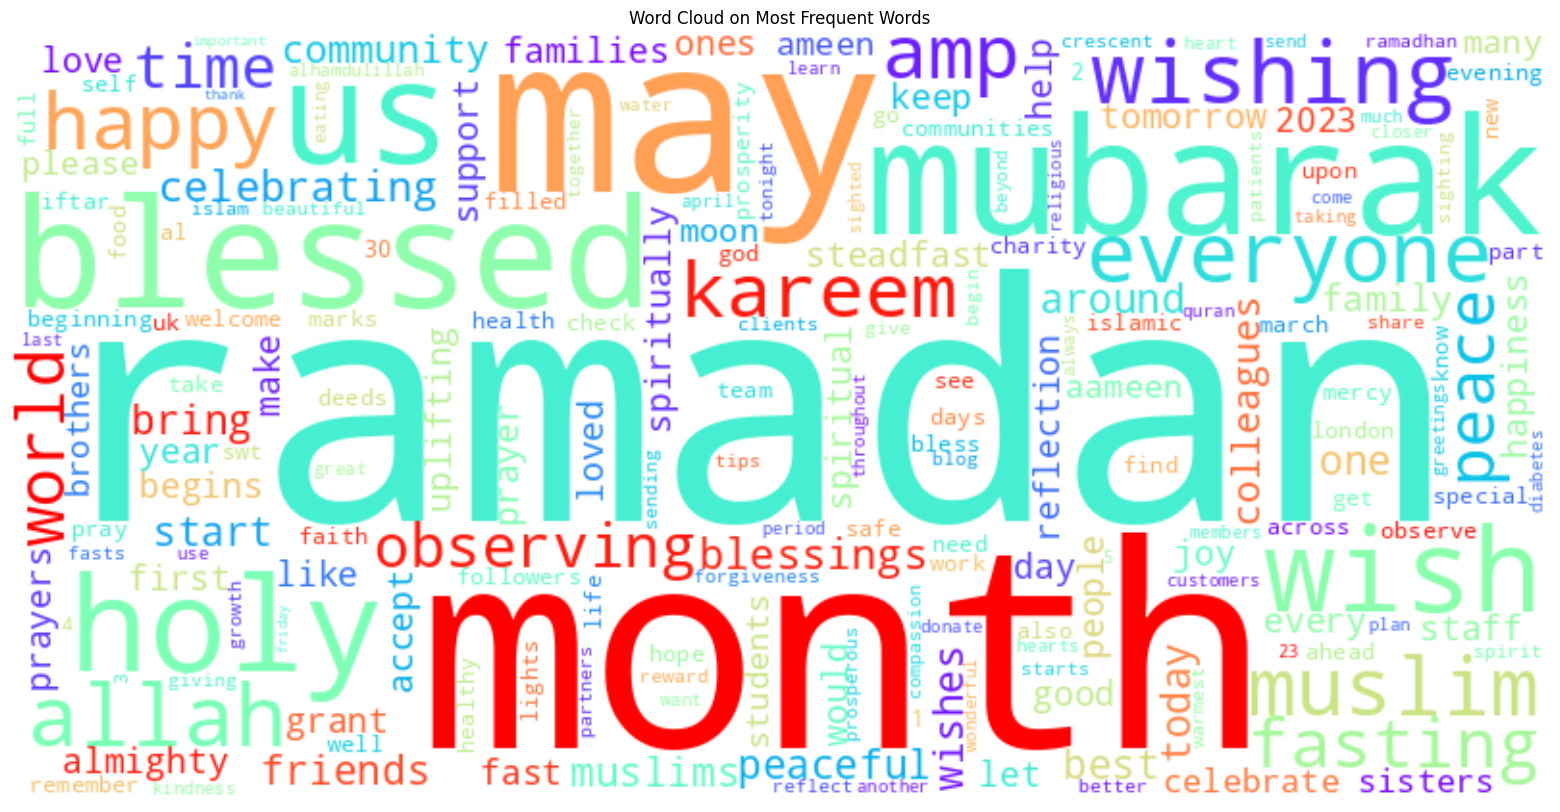

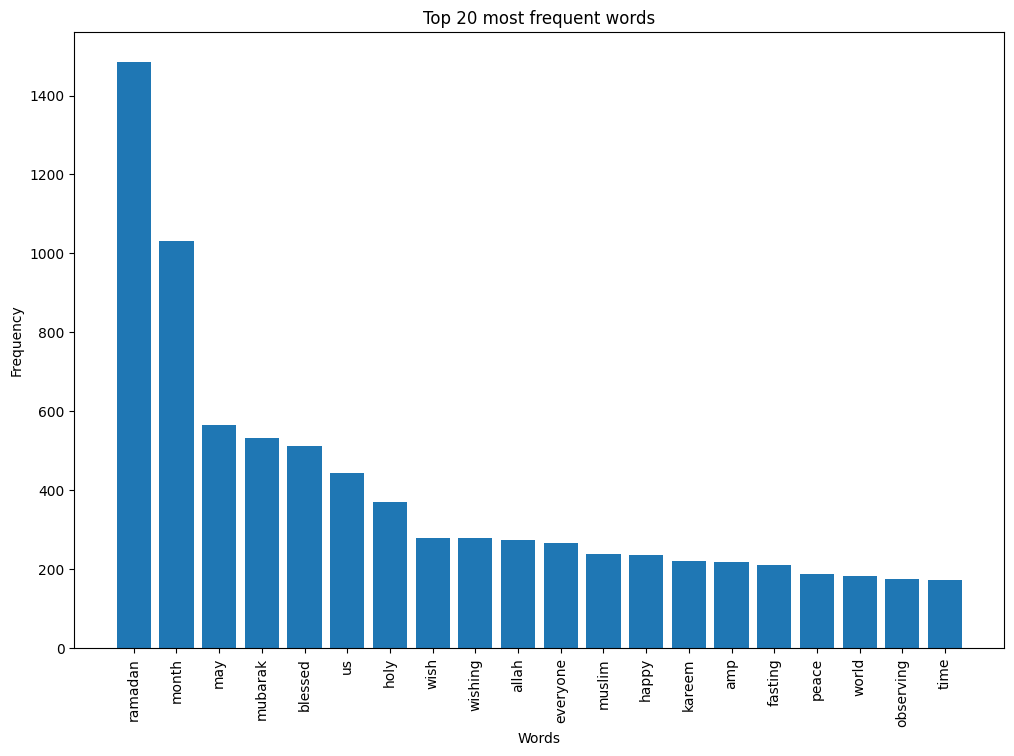


Words with a frequency of more than 50%:
ramadan      1.486
month        1.032
may          0.565
mubarak      0.532
blessed      0.511
             ...  
poet         0.001
laureate     0.001
forgiving    0.001
beings       0.001
completed    0.001
Length: 4836, dtype: float64


<ipython-input-188-69486ff763e9>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Content["High_Frequency"] = Content["Tweets"].str.split().apply(lambda x: any(word_freq[word] > 0.5 for word in x))


In [ ]:
content_analysis(tweetsDataFrame)

Engagement Level of Tweets

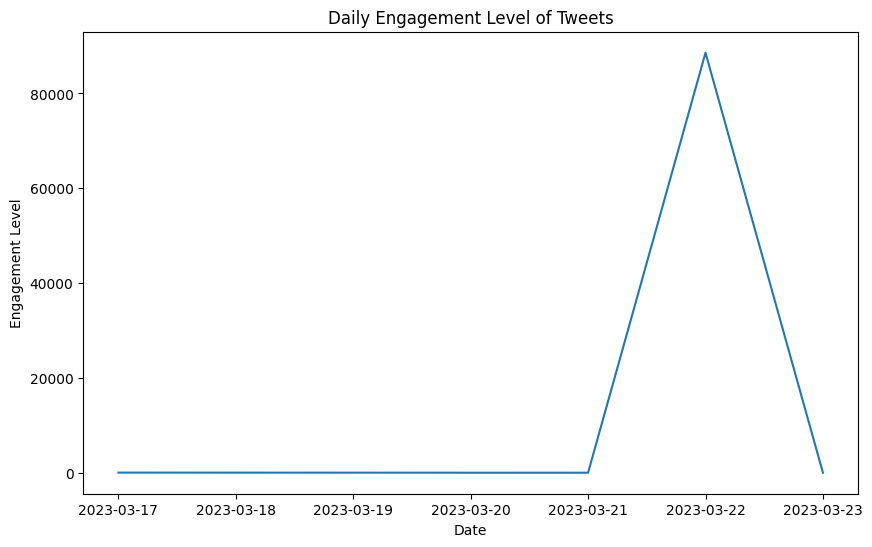

In [ ]:
# Calculate the engagement level for each tweet by adding retweets and favorites
tweetsDataFrame["engagement level"] = tweetsDataFrame["retweet_count"] + tweetsDataFrame["favorite_count"]

# Group the tweets by date and calculate the total engagement level for each day
dailyEngagement = tweetsDataFrame.groupby(tweetsDataFrame["created_at"].dt.date)["engagement level"].sum()

# Create a plot with a size of 10x6 inches
plt.figure(figsize=(10,6))

# Plot a line graph of the daily engagement level over time
plt.plot(dailyEngagement.index, dailyEngagement.values)

plt.xlabel("Date")
plt.ylabel("Engagement Level")
plt.title("Daily Engagement Level of Tweets")
plt.show()

#Similarity Analysis of the Dataset

<ipython-input-206-6570dea4c846>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Similarity = Similarity.append(chunk, ignore_index=True)


Enter first keyword: ramadan
Enter second keyword: month


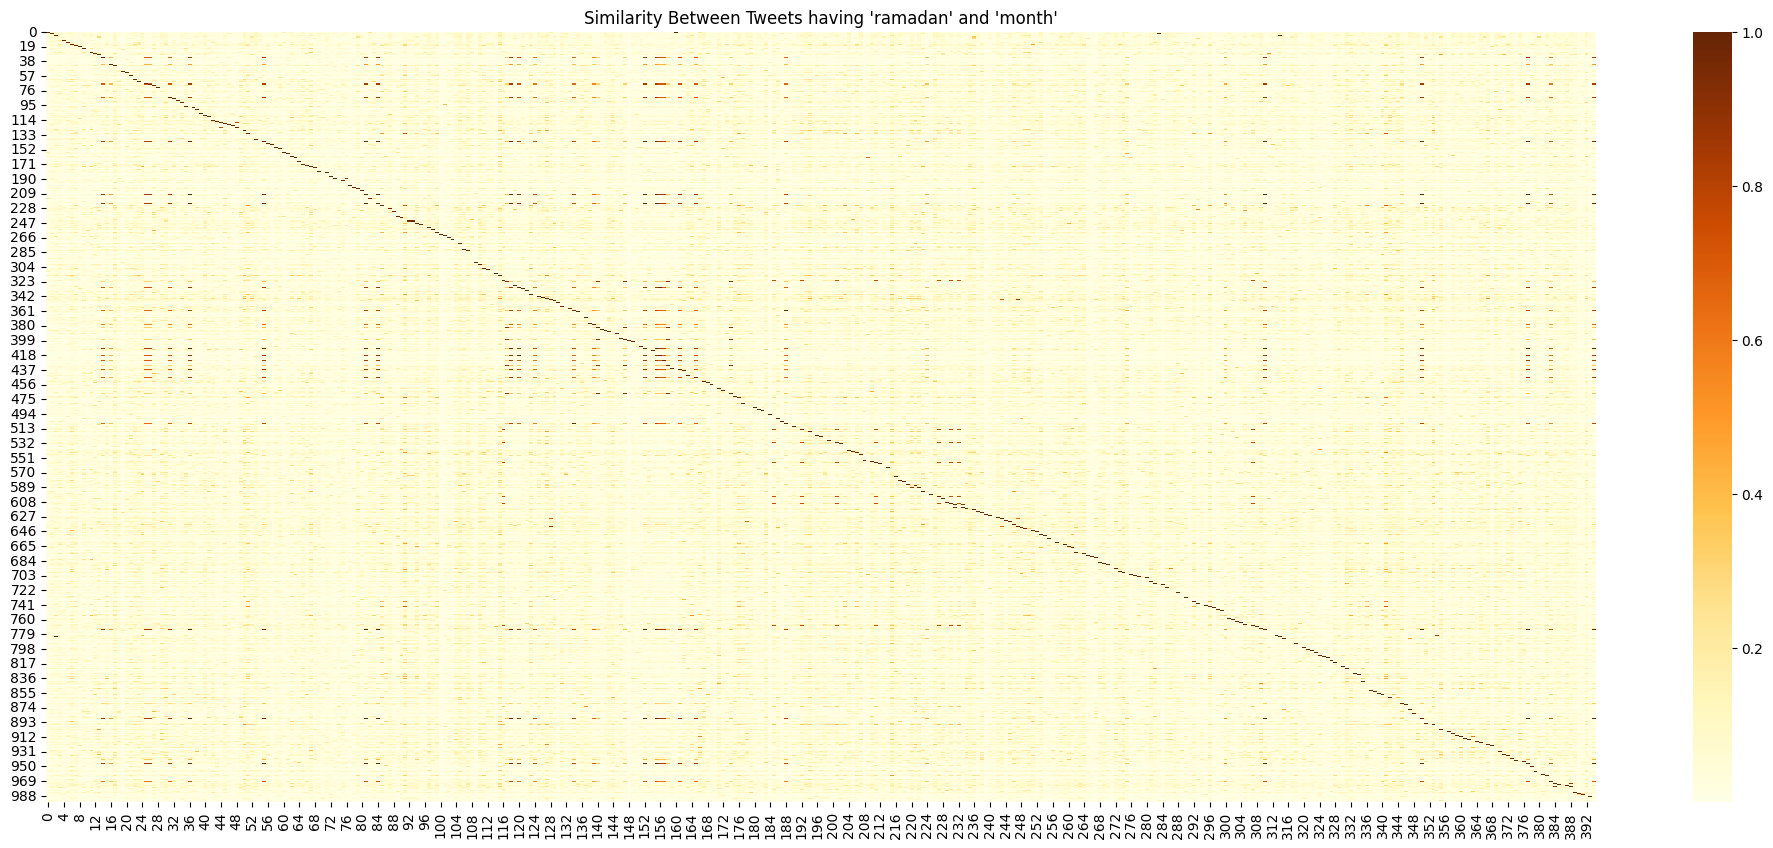

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Set the maximum number of rows to read at a time
chunksize = 1000

# Create an empty DataFrame to store the data
Similarity = pd.DataFrame()

# Loop over the CSV file and read in chunks of 1000 rows
for chunk in pd.read_csv('/content/merged_file.csv', chunksize=chunksize):
    # Append the current chunk to the DataFrame
    Similarity = Similarity.append(chunk, ignore_index=True)


    # Stop reading the file if we have read in the maximum number of rows
    if len(Similarity) >= 1000:
        break

# Enter the keywords to search
kw1 = input("Enter first keyword: ")
kw2 = input("Enter second keyword: ")

#def similarity_analysis(Similarity):
  
# Extract tweets for the first keyword
tweets_kw1 = Similarity.loc[Similarity['full_text'].str.contains(kw1, case=False)]
if len(tweets_kw1) == 0:
    print(f"No tweets found for '{kw1}'")
    exit()

# Extract tweets for the second keyword
tweets_kw2 = Similarity.loc[Similarity['full_text'].str.contains(kw2, case=False)]
if len(tweets_kw2) == 0:
    print(f"No tweets found for '{kw2}'")
    exit()

# Combine the tweets into two lists
docs1 = tweets_kw1['full_text'].tolist()
docs2 = tweets_kw2['full_text'].tolist()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# fit the vectorizer on the documents
vectorizer.fit(docs1 + docs2)

# transform the documents into TF-IDF vectors
tfidf_matrix1 = vectorizer.transform(docs1)
tfidf_matrix2 = vectorizer.transform(docs2)

# compute the cosine similarity between the TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

# plot the heatmap
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(cosine_sim, cmap='YlOrBr') 
plt.title(f"Similarity Between Tweets having '{kw1}' and '{kw2}'")
plt.show()

# get the indices of the most similar tweets
idx = cosine_sim.argmax(axis=1)


# Sentiment Analysis

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

# List variable to use to store all tweets
STRONG_THERSHOLD = 0.70
MINIMUN_THERSHOLD = 0.33
lstTweets = []
positive = 0
negative = 0
stronglyPositive = 0
stronglyNegative = 0
neutral = 0
polarity = 0
neutral_list = []
negative_list = []
strongly_negative_list = []
positive_list = []
strongly_positive_list = []
noOfTweet = len(tweetsDataFrame["Tweets"])


# Using TwitterSearchScraper to scrape data and append tweets to list
for tweet in tweetsDataFrame["Tweets"]:
    
    lstTweets.append(tweet)
    
    analysis = TextBlob(tweet)
    
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    
    if neg > MINIMUN_THERSHOLD:
        if neg > STRONG_THERSHOLD:
            strongly_negative_list.append(tweet)
            stronglyNegative += 1
        else :
            negative_list.append(tweet)
            negative += 1
    elif pos > MINIMUN_THERSHOLD:
        if pos > STRONG_THERSHOLD:
            strongly_positive_list.append(tweet)
            stronglyPositive += 1
        else :
            positive_list.append(tweet)
            positive += 1
    elif neu > MINIMUN_THERSHOLD:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
stronglyPositive = percentage(stronglyPositive, noOfTweet)
negative = percentage(negative, noOfTweet)
stronglyNegative = percentage(stronglyNegative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
stronglyPositive = format(stronglyPositive, '.1f')
stronglyNegative = format(stronglyNegative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
lstTweets = pd.DataFrame(lstTweets)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
strongly_negative_list = pd.DataFrame(strongly_negative_list)
strongly_positive_list = pd.DataFrame(strongly_positive_list)
print("total number: ", len(lstTweets))
print("positive number: ", len(positive_list))
print("negative number: ", len(negative_list))
print("strongly positive number: ", len(strongly_positive_list))
print("strongly negative number: ", len(strongly_negative_list))
print("neutral number: ", len(neutral_list))

total number:  2237
positive number:  1081
negative number:  40
strongly positive number:  268
strongly negative number:  1
neutral number:  842


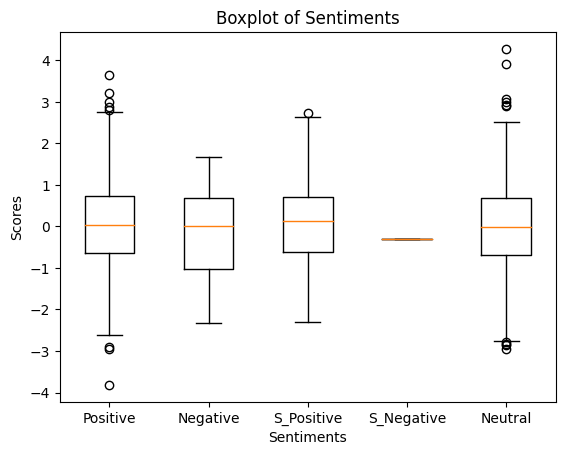

<Figure size 50000x5000 with 0 Axes>

In [ ]:

positive = 1081
negative = 40
strongly_positive = 268
strongly_negative = 1
neutral = 842

data = [np.random.normal(size=positive),
        np.random.normal(size=negative),
        np.random.normal(size=strongly_positive),
        np.random.normal(size=strongly_negative),
        np.random.normal(size=neutral)]

# Create a figure and axis object
fig, ax = plt.subplots()
plt.figure(figsize=(500, 50))

# Create a boxplot
ax.boxplot(data, labels=['Positive', 'Negative', 'S_Positive', 'S_Negative', 'Neutral'])

# Set axis labels and title
ax.set_xlabel('Sentiments')
ax.set_ylabel('Scores')
ax.set_title('Boxplot of Sentiments')

# Show the plot
plt.show()

In [ ]:
positive_list

[]

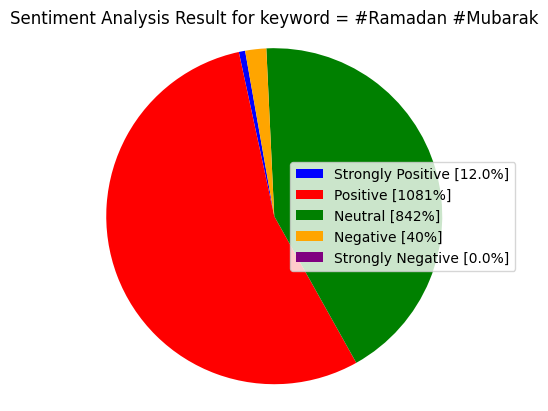

In [ ]:
#Creating PieChart
availableHashtags = ' '.join(hashtags)
labels = ['Strongly Positive ['+str(stronglyPositive)+'%]' ,'Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]', 'Strongly Negative ['+str(stronglyNegative)+'%]']
sizes = [stronglyPositive, positive, neutral, negative, stronglyNegative]
colors = ['blue', 'red', 'green', 'orange', 'purple']
patches, texts = plt.pie(sizes,colors=colors, startangle=100)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = "+availableHashtags+"")
plt.axis('equal')
plt.show()

#Sentiment Analysis on the neutrals

In [ ]:
THERSHOLD_FOR_NEUTRALS = 0.85
pure_neutrals_list = []
mild_neutrals_list = []
pure_neutrals = 0
mild_neutrals = 0
polarity = 0
totalNeutralTweets = len(neutral_list)

def neutrality(totalNeutralTweets):
  for index in range(totalNeutralTweets):
    tweet = neutral_list.iloc[index, 0]

    # Calculate VADER sentiment scores
    vader_scores = SentimentIntensityAnalyzer().polarity_scores(tweet)
        
    # Combine sentiment and emotion scores
    analysis = TextBlob(tweet)

    pos = vader_scores['pos'] 
    neg = vader_scores['neg'] 
    neu = vader_scores['neu']
    comp = score['compound']
    polarity += analysis.sentiment.polarity 


    if neu >= THERSHOLD_FOR_NEUTRALS:
        mild_neutrals_list.append(tweet)
        mild_neutrals += 1
    else:
        pure_neutrals_list.append(tweet)
        pure_neutrals += 1

mild_neutrals = percentage(mild_neutrals, totalNeutralTweets)
pure_neutrals = percentage(pure_neutrals, totalNeutralTweets)
mild_neutrals = format(mild_neutrals, '.1f')
pure_neutrals = format(pure_neutrals, '.1f')
pure_neutrals_list = pd.DataFrame(pure_neutrals_list)
mild_neutrals_list = pd.DataFrame(mild_neutrals_list)
print("total number: ", totalNeutralTweets)
print("pure_neutrals number: ", len(pure_neutrals_list))
print("mild_neutrals number: ", len(mild_neutrals_list))

total number:  842
pure_neutrals number:  0
mild_neutrals number:  0


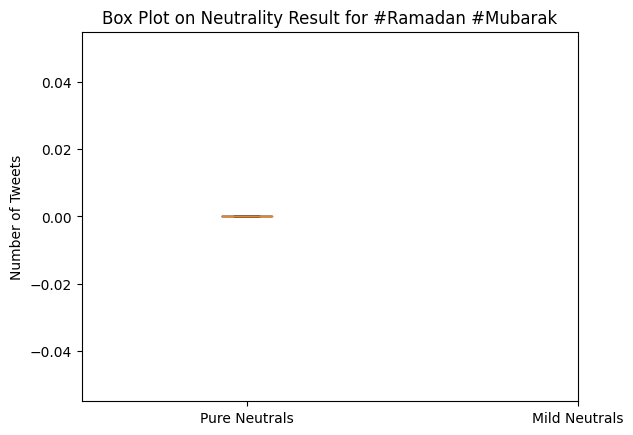

In [ ]:

# Create a list of data to plot
data = [len(pure_neutrals_list), len(mild_neutrals_list)]

# Create a box plot
plt.boxplot(data)
colors = ['blue', 'green']

# Add labels and title
plt.xticks([1, 2], ['Pure Neutrals', 'Mild Neutrals'])
plt.ylabel('Number of Tweets')
plt.title("Box Plot on Neutrality Result for "+availableHashtags+"")


# Display the plot
plt.show()

#**VS**



#Emotion Extraction using NRC of the Neutral Tweets

In [ ]:
!pip install NRCLex
nltk.download('punkt')
from nrclex import NRCLex

# Create a dataframe to store the results
results = pd.DataFrame(columns=['Tweet', 'fear', 'anger', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'])

fear_count = 0
anger_count = 0
trust_count = 0
surprise_count = 0
positive_count = 0
negative_count = 0
sadness_count = 0
disgust_count = 0
joy_count = 0
emotionless_count = 0
fear_list = []
anger_list = []
trust_list = []
surprise_list = []
positive_list = []
negative_list = []
sadness_list = []
disgust_list = []
joy_list = []
emotionless_list = [] 

def emotions(results):
# Iterate over each tweet and perform emotion analysis
  for index in range(totalNeutralTweets):
    max_value = 0
    emotion = ""
    tweet = neutral_list.iloc[index, 0]

    # Create an NRCLex object for the tweet
    text = NRCLex(tweet)
    
    # Calculate the emotion scores for the tweet
    emotions = text.affect_frequencies

    # Storing every emotion of the neutral tweets
    if(emotions['fear'] > max_value):
        max_value = emotions['fear']
        emotion = 'fear'
        fear_count += 1 
    if(emotions['anger'] > max_value):
        max_value = emotions['anger']
        emotion = 'anger'
        anger_count += 1
    if(emotions['trust'] > max_value):
        max_value = emotions['trust']
        emotion = 'trust'
        trust_count += 1
    if(emotions['surprise'] > max_value):
        max_value = emotions['surprise']
        emotion = 'surprise'
        surprise_count += 1
    if(emotions['positive'] > max_value):
        max_value = emotions['positive']
        emotion = 'positive'
        positive_count += 1
    if(emotions['negative'] > max_value):
        max_value = emotions['negative']
        emotion = 'negative'
        negative_count += 1
    if(emotions['sadness'] > max_value):
        max_value = emotions['sadness']
        emotion = 'sadness'
        sadness_count += 1
    if(emotions['disgust'] > max_value):
        max_value = emotions['disgust']
        emotion = 'disgust'
        disgust_count += 1
    if(emotions['joy'] > max_value):
        max_value = emotions['joy']
        emotion = 'joy'
        joy_count += 1
    if(max_value == 0):
        max_value = 1
        emotion = 'emotionless'
        emotionless_count += 1

    if(emotion == 'fear'):
        fear_list.append(tweet)
    elif(emotion == 'anger'):
        anger_list.append(tweet)
    elif(emotion == 'trust'):
        trust_list.append(tweet)
    elif(emotion == 'surprise'):
        surprise_list.append(tweet)
    elif(emotion == 'positive'):
        positive_list.append(tweet)
    elif(emotion == 'negative'):
        negative_list.append(tweet)
    elif(emotion == 'sadness'):
        sadness_list.append(tweet)
    elif(emotion == 'disgust'):
        disgust_list.append(tweet)
    elif(emotion == 'joy'):
        joy_list.append(tweet)
    else:
        emotionless_list.append(tweet)
    
    # Append the results to the dataframe
    results = results.append({'Tweet': tweet, 'fear': emotions['fear'], 'anger': emotions['anger'], 'trust': emotions['trust'], 'surprise': emotions['surprise'], 'positive': emotions['positive'], 'negative': emotions['negative'], 'sadness': emotions['sadness'], 'disgust': emotions['disgust'], 'joy': emotions['joy']}, ignore_index=True)

fear_count = percentage(fear_count, totalNeutralTweets)
fear_count = format(fear_count, '.1f')
anger_count = percentage(anger_count, totalNeutralTweets)
anger_count = format(anger_count, '.1f')
trust_count = percentage(trust_count, totalNeutralTweets)
trust_count = format(trust_count, '.1f')
surprise_count = percentage(surprise_count, totalNeutralTweets)
surprise_count = format(surprise_count, '.1f')
positive_count = percentage(positive_count, totalNeutralTweets)
positive_count = format(positive_count, '.1f')
negative_count = percentage(negative_count, totalNeutralTweets)
negative_count = format(negative_count, '.1f')
sadness_count = percentage(sadness_count, totalNeutralTweets)
sadness_count = format(sadness_count, '.1f')
disgust_count = percentage(disgust_count, totalNeutralTweets)
disgust_count = format(disgust_count, '.1f')
joy_count = percentage(joy_count, totalNeutralTweets)
joy_count = format(joy_count, '.1f')
emotionless_count = percentage(emotionless_count, totalNeutralTweets)
emotionless_count = format(emotionless_count, '.1f')

print("")
print("total number: ", totalNeutralTweets)
print("tweets with fear: ", len(fear_list))
print("tweets with anger: ", len(anger_list))
print("tweets with trust: ", len(trust_list))
print("tweets with surprise: ", len(surprise_list))
print("tweets with positive: ", len(positive_list))
print("tweets with negative: ", len(negative_list))
print("tweets with sadness: ", len(sadness_list))
print("tweets with disgust: ", len(disgust_list))
print("tweets with joy: ", len(joy_list))
print("tweets with emotionless: ", len(emotionless_list))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

total number:  842
tweets with fear:  0
tweets with anger:  0
tweets with trust:  0
tweets with surprise:  0
tweets with positive:  0
tweets with negative:  0
tweets with sadness:  0
tweets with disgust:  0
tweets with joy:  0
tweets with emotionless:  0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
